# Project Loyalty Program Analysis
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Fixing Column Names
    * Checking Data Quality
    * Checking Missing Values
    * Handling Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Exploratory Data Analysis (EDA)

4. Hypothesis Testing

5. Overall Conclusion

## Introduction

A building-material retailer Home World, recently introduced a new loyalty program. After this launching, we have to evaluate the results of that program, whether it has actually led to the expected growth in average purchase size and number of items in the cart.


## Data Pra-processing <a id='intro'></a>
### Loading Data

In [ ]:
# Load the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 100)

In [ ]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, columns containing dates are converted to date data type

df_retail = pd.read_csv('retail_dataset_us_1.csv', parse_dates=['purchasedate']) 
df_product = pd.read_csv('product_codes_us_1.csv', sep=";")

The dataset includes the following fields:

- `retail_dataset_us.csv` contains:

    - `purchaseId`
    - `item_ID`
    - `purchasedate`
    - `Quantity` — the number of items in the purchase
    - `CustomerID`
    - `ShopID`
    - `loyalty_program` — whether the customer is a member of the loyalty program


- `product_codes_us.csv` contains:

    - `productID`
    - `price_per_one`

**Conclusions**

We have two datasets: `retail_dataset` and `product_codes`. 
1. `retail_dataset` contains information on the customer's purchase transaction, which are `purchaseId`, 
`item_ID`, `purchasedate`, `Quantity` — the number of items in the purchase, `CustomerID`,  `ShopID`, `loyalty_program` — whether the customer is a member of the loyalty program.

2. `product_codes` contains information on the product, `productID`, and `price_per_one` of each product.

It is clear that the data we have is sufficient for us to conduct this loyalty analysis and come up with the conclusions whether it has actually led to the expected growth in average purchase size and number of items in the cart.

To continue the analysis, we need to do data pre-processing first.

### Preliminary Exploratory Data

In [ ]:
# Show the shape of the first DataFrame

df_retail.shape

(105335, 7)

In [ ]:
# Show the shape of the second DataFrame

df_product.shape

(3159, 2)

In [ ]:
# Show the data head of the first DataFrame

df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [ ]:
# Show the data head of the second DataFrame

df_product.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [ ]:
# Show the info of the first DataFrame

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       105335 non-null  object        
 1   item_ID          105335 non-null  object        
 2   Quantity         105335 non-null  int64         
 3   purchasedate     105335 non-null  datetime64[ns]
 4   CustomerID       69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   ShopID           105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [ ]:
# Show the info of the second DataFrame

df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [ ]:
# Show the data distribution of the first DataFrame

df_retail.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000000000000,69125.000000000000000,105335.000000000000000
mean,7.821218018702235,21019.302047016273718,0.226344519865192
std,327.946694907624874,1765.444679266724734,0.418466654159923
min,-74216.000000000000000,18025.000000000000000,0.000000000000000
25%,0.000000000000000,19544.000000000000000,0.000000000000000
50%,2.000000000000000,20990.000000000000000,0.000000000000000
75%,7.000000000000000,22659.000000000000000,0.000000000000000
max,74214.000000000000000,23962.000000000000000,1.000000000000000


In [ ]:
# Check the range of date in the df_retail

df_retail['purchasedate'].min(), df_retail['purchasedate'].max()

(Timestamp('2016-12-01 08:26:00'), Timestamp('2017-02-28 17:04:00'))

In [ ]:
# Show the data distribution of the second DataFrame

df_product.describe()

,price_per_one
count,3159.000000000000000
mean,2.954495093383982
std,7.213807949543177
min,0.000000000000000
25%,0.650000000000000
50%,1.450000000000000
75%,3.290000000000000
max,175.000000000000000


### Fixing Column Names
- Change all column names in the tables to lower case and snake_case
- Change the name of the item_id column in the first table become `product_id` because has similar values in the product_id of the second table).


In [ ]:
# Change all column names in the tables to lower case and snake_case
# Change the name of the item_id column in the first table become `product_id`

df_retail.columns = ['purchase_id', 'product_id', 'quantity', 'purchase_date', 'customer_id', 'loyalty_program', 
                     'shop_id']
df_product.columns = ['product_id', 'price_per_one']

In [ ]:
# Look back into the table after fixing the column names

df_retail.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [ ]:
# Look back into the table after fixing the column names

df_product.head()

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


### Checking Data Quality

#### `df_retail`

In [ ]:
# Check the data quality of the purchase_id column

df_retail['purchase_id'].value_counts()

537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
542531       1
537841       1
C543775      1
537013       1
C541650      1
Name: purchase_id, Length: 4894, dtype: int64

In [ ]:
# Check the data quality of the item_id column

df_retail['product_id'].value_counts()

85123A      565
22423       499
22469       414
22720       377
85099B      372
           ... 
DCGS0072      1
22125         1
84977         1
84964B        1
79320         1
Name: product_id, Length: 3159, dtype: int64

In [ ]:
# Check the data quality of the quantity column

sorted(df_retail['quantity'].unique())

[-74216,
 -9361,
 -2601,
 -1431,
 -1401,
 -991,
 -940,
 -742,
 -724,
 -601,
 -501,
 -401,
 -391,
 -321,
 -311,
 -301,
 -291,
 -241,
 -235,
 -231,
 -224,
 -218,
 -208,
 -207,
 -202,
 -201,
 -193,
 -178,
 -174,
 -163,
 -151,
 -146,
 -145,
 -141,
 -131,
 -121,
 -115,
 -107,
 -101,
 -100,
 -97,
 -95,
 -93,
 -89,
 -85,
 -81,
 -78,
 -77,
 -73,
 -71,
 -70,
 -65,
 -62,
 -61,
 -60,
 -58,
 -55,
 -54,
 -53,
 -51,
 -49,
 -48,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -39,
 -37,
 -36,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,


In [ ]:
# Check the data that contains minus values in the quantity column

df_retail.loc[df_retail['quantity'] < 0]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,0,Shop 27
109,C542910,20726,-2,2017-02-01 15:38:00,23190.0,1,Shop 19
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,0,Shop 27
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,1,Shop 3
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,0,Shop 9
...,...,...,...,...,...,...,...
105160,C541650,M,-2,2017-01-20 11:44:00,NaN,0,Shop 0
105172,C540246,79320,-2,2017-01-05 15:43:00,18760.0,0,Shop 19
105211,C539467,22801,-2,2016-12-19 12:46:00,20723.0,0,Shop 13
105250,C540847,22197,-3,2017-01-11 17:35:00,19137.0,0,Shop 0


In [ ]:
# Get the percentage of data that contains minus values in the quantity column vs. the whole data

len(df_retail.loc[df_retail['quantity'] < 0]) / len(df_retail) * 100

2.01072767835952

**Findings:**
- There are  minus values in the `quantity` column in the first table of 2118 rows (2% vs. the whole data). We don't know what is the meaning of these values (have to ask the IT team), they might be return products, but because we can't enough resources to check further, it's better to change the value to zero (0) values.

In [ ]:
# Change the minus value in the quantity column with zero 

df_retail.loc[df_retail['quantity'] < 0, 'quantity'] = 0
df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


In [ ]:
# Check again whether any the minus values after removing them

df_retail.loc[df_retail['quantity'] < 0]

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id


In [ ]:
# Check the data quality of the purchase_date column

df_retail['purchase_date'].value_counts()

2016-12-06 16:57:00    675
2016-12-09 14:09:00    652
2016-12-10 14:59:00    621
2016-12-07 15:28:00    601
2016-12-06 09:58:00    597
                      ... 
2016-12-10 16:01:00      1
2016-12-07 10:33:00      1
2017-02-02 13:36:00      1
2017-01-21 16:11:00      1
2017-01-20 11:44:00      1
Name: purchase_date, Length: 4430, dtype: int64

In [ ]:
# Check the data quality of the customer_id column

df_retail['customer_id'].value_counts()

18427.0    796
23520.0    757
20285.0    751
20990.0    718
20590.0    549
          ... 
22417.0      1
23295.0      1
18945.0      1
20749.0      1
23763.0      1
Name: customer_id, Length: 1749, dtype: int64

In [ ]:
# Check the data quality of the loyalty_program column

df_retail['loyalty_program'].value_counts()

0    81493
1    23842
Name: loyalty_program, dtype: int64

In [ ]:
# Check the data quality of the shop_id column

sorted(df_retail['shop_id'].unique())

['Shop 0',
 'Shop 1',
 'Shop 10',
 'Shop 11',
 'Shop 12',
 'Shop 13',
 'Shop 14',
 'Shop 15',
 'Shop 16',
 'Shop 17',
 'Shop 18',
 'Shop 19',
 'Shop 2',
 'Shop 20',
 'Shop 21',
 'Shop 22',
 'Shop 23',
 'Shop 24',
 'Shop 25',
 'Shop 26',
 'Shop 27',
 'Shop 28',
 'Shop 29',
 'Shop 3',
 'Shop 30',
 'Shop 4',
 'Shop 5',
 'Shop 6',
 'Shop 7',
 'Shop 8',
 'Shop 9']

#### `df_product`

In [ ]:
# Check the data quality of the shop_id column

df_product['product_id'].value_counts()

10002     1
72132     1
72134     1
72140E    1
72225C    1
         ..
22164     1
22165     1
22166     1
22167     1
m         1
Name: product_id, Length: 3159, dtype: int64

In [ ]:
# Check the data quality of the shop_id column

df_product['price_per_one'].value_counts()

0.000000000000000      382
1.250000000000000      251
0.850000000000000      195
0.420000000000000      183
2.950000000000000      125
                      ... 
57.950000000000003       1
175.000000000000000      1
35.950000000000003       1
110.000000000000000      1
42.549999999999997       1
Name: price_per_one, Length: 192, dtype: int64

### Checking Missing Values


In [ ]:
# Check missing values in the first table

df_retail.isna().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
shop_id                0
dtype: int64

In [ ]:
# Calculate the percentage of the missing values in the first table

df_retail.isna().sum() / len(df_retail) * 100

purchase_id         0.000000000000000
product_id          0.000000000000000
quantity            0.000000000000000
purchase_date       0.000000000000000
customer_id        34.376038353823517
loyalty_program     0.000000000000000
shop_id             0.000000000000000
dtype: float64

In [ ]:
# Check missing values in the second table

df_product.isna().sum()

product_id       0
price_per_one    0
dtype: int64

**Findings:**
- There is missing values in the table of `df_retail` which is in the `customer_id` column of 36210 rows = 34.37% of the whole data. We will be handling these missing values in the following step.

### Handling Missing Values


In [ ]:
# Check the missing values in the `customer_id` and save to the new table

missing_customer_id = df_retail.loc[df_retail['customer_id'].isna()]
missing_customer_id

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


In [ ]:
# Check the distribution of missing values

missing_customer_id.describe()

,quantity,customer_id,loyalty_program
count,36210.000000000000000,0.0,36210.0
mean,2.313311239988953,NaN,0.0
std,34.722731847224402,NaN,0.0
min,0.000000000000000,NaN,0.0
25%,0.000000000000000,NaN,0.0
50%,0.000000000000000,NaN,0.0
75%,2.000000000000000,NaN,0.0
max,5567.000000000000000,NaN,0.0


In [ ]:
# Check the zero value and the minus value in the quantity column

missing_values = missing_customer_id.loc[missing_customer_id['quantity'] < 1]
missing_values

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
23,538149,21154,0,2016-12-09 16:27:00,NaN,0,Shop 0
28,539451,22376,0,2016-12-17 16:59:00,NaN,0,Shop 0
32,540468,21990,0,2017-01-07 13:55:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105297,540646,84707A,0,2017-01-10 14:32:00,NaN,0,Shop 0
105303,537666,90214D,0,2016-12-07 18:36:00,NaN,0,Shop 0
105311,538884,21166,0,2016-12-14 15:56:00,NaN,0,Shop 0
105316,543013,22266,0,2017-02-02 13:35:00,NaN,0,Shop 0


In [ ]:
# Calculate the percentage of the missing values in the customer_id column that contains the zero values in quantity

len(missing_values) / len(df_retail) * 100

19.19210139080078

In [ ]:
# Check the distribution of missing values in the customer_id column that contains the zero values

missing_values.describe()

,quantity,customer_id,loyalty_program
count,20216.0,0.0,20216.0
mean,0.0,NaN,0.0
std,0.0,NaN,0.0
min,0.0,NaN,0.0
25%,0.0,NaN,0.0
50%,0.0,NaN,0.0
75%,0.0,NaN,0.0
max,0.0,NaN,0.0


**Findings:**
- There are 20216 rows (19.19% vs. the whole data) which contains missing values in the customer_id column and the zero values in the quantity column. It might be because of an error in the system when retrieving the data.
- We will remove them in the following step, since they will not impact the analysis.
- While for the rest missing values in the customer_id column = 15994 rows, the value will be change to 0.

In [ ]:
# Remove the missing values in the customer_id column that have the zero values in the quantity column

df_retail = df_retail.loc[~(df_retail['customer_id'].isna()) | ~(df_retail['quantity'] < 1)]

In [ ]:
# Check the rest of missing values in the df_retail table after the previous step

df_retail.isna().sum()

purchase_id            0
product_id             0
quantity               0
purchase_date          0
customer_id        15994
loyalty_program        0
shop_id                0
dtype: int64

In [ ]:
# Change the value of missing values in the df_retail_filt table with zero (0) values

df_retail.loc[df_retail['customer_id'].isna(), 'customer_id'] = 0

In [ ]:
# Check the rest of missing values in the df_retail_filt table after removing all missing values

df_retail.isna().sum()

purchase_id        0
product_id         0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

### Checking Data Duplicate

In [ ]:
# Checks for duplicate data in the first table

df_retail.duplicated().sum()

1001

In [ ]:
# Checks for duplicate data in the second table

df_product.duplicated().sum()

0

In [ ]:
# Remove the duplicate data in the first table

df_retail = df_retail.drop_duplicates().reset_index(drop=True)

In [ ]:
# Checks again for duplicate data in the first table

df_retail.duplicated().sum()

0

### Initial Conclusion

* Our datasets amounted **105335** rows and **7** columns for the df_retail and **3159** rows and **2** columns for the df_product.
* The range of data is between 1 Dec 2016 through 28 Feb 2017.
* We change all column names to lower casea dn snake_case to make analysis easier.
* There is missing values in the table of `df_retail` which is in the `customer_id` column of 36210 rows = 34.37% of the whole data:
    - There are 20216 rows (19.19% vs. the whole data) which contains missing values in the customer_id column and the zero values in the quantity column. It might be because of an error in the system when retrieving the data.
    - We remove them in the following step, since they will not impact the analysis.
    - While for the rest missing values in the customer_id column = 15994 rows, we've change the value with 0.
- There are 1001 rows that duplicated in the df_retail table and we've remove them.

## Exploratory Data Analysis (EDA)

In [ ]:
# Look at the df_retail table

df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


In [ ]:
# Add a date and time column and a separate column for dates

df_retail['date'] = df_retail['purchase_date'].dt.date

In [ ]:
# Conversion the data type of column date to datetime

df_retail['date'] = pd.to_datetime(df_retail['date'])


In [ ]:
# Look again at the table after adding a new column

df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13
...,...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10


In [ ]:
# Add the price_per_product from the second table to the first table

df_retail = df_retail.merge(df_product, on='product_id', how='left')
df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,0.42
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,1.65
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,0.72
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,2.55
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,0.00
...,...,...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13,1.25
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05,5.95
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09,6.95
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10,0.42


In [ ]:
# Calculate the total purchase per each purchase_id

df_retail['total_purchases'] = (df_retail['price_per_one'] * df_retail['quantity']).round(1)
df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,price_per_one,total_purchases
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,0.42,4.6
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,1.65,0.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,0.72,5.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,2.55,0.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13,1.25,1.2
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05,5.95,0.0
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09,6.95,7.0
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10,0.42,4.6


### The cumulative purchase by customer membership

Firstly, we have to calculate the purchases by `date` because in the df_retail table the data still per purchase_id.

In [ ]:
# Calculate the purchases by date in the df_retail table and create a new table

df_orders_agg = df_retail.groupby(['date', 'loyalty_program']).agg({
    'total_purchases': 'sum',
    'purchase_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()
df_orders_agg['total_purchases'] = df_orders_agg['total_purchases'].round()

In [ ]:
# Look at the new table of df_orders_agg

df_orders_agg

,date,loyalty_program,total_purchases,purchase_id,customer_id
0,2016-12-01,0,21105.0,85,63
1,2016-12-01,1,6044.0,49,36
2,2016-12-02,0,18225.0,97,82
3,2016-12-02,1,9847.0,66,36
4,2016-12-03,0,12176.0,54,36
...,...,...,...,...,...
131,2017-02-25,1,2087.0,9,9
132,2017-02-27,0,4040.0,27,24
133,2017-02-27,1,1175.0,8,7
134,2017-02-28,0,7512.0,41,35


Then, we split the data by grouping from the loyalty_program.

In [ ]:
# Grouping data by each loyalty_program and save it into new tables

loyalty_orders_agg = df_orders_agg[df_orders_agg['loyalty_program'] == 1].reset_index(drop=True)
non_loyalty_orders_agg = df_orders_agg[df_orders_agg['loyalty_program'] == 0].reset_index(drop=True)

In [ ]:
# Look into the new table of loyalty_orders_agg

loyalty_orders_agg

,date,loyalty_program,total_purchases,purchase_id,customer_id
0,2016-12-01,1,6044.0,49,36
1,2016-12-02,1,9847.0,66,36
2,2016-12-03,1,2816.0,25,20
3,2016-12-05,1,4379.0,26,25
4,2016-12-06,1,7140.0,44,39
...,...,...,...,...,...
63,2017-02-23,1,5090.0,22,19
64,2017-02-24,1,4398.0,24,21
65,2017-02-25,1,2087.0,9,9
66,2017-02-27,1,1175.0,8,7


In [ ]:
# Look into the new table of non_loyalty_orders_agg

non_loyalty_orders_agg

,date,loyalty_program,total_purchases,purchase_id,customer_id
0,2016-12-01,0,21105.0,85,63
1,2016-12-02,0,18225.0,97,82
2,2016-12-03,0,12176.0,54,36
3,2016-12-05,0,10619.0,68,51
4,2016-12-06,0,13723.0,78,52
...,...,...,...,...,...
63,2017-02-23,0,7887.0,43,35
64,2017-02-24,0,8112.0,39,37
65,2017-02-25,0,9906.0,42,36
66,2017-02-27,0,4040.0,27,24


Lastly, we calculate the cumulative of the data using metode cumsum().

In [ ]:
# Created a function to calculate the data cumulative

for _df in [loyalty_orders_agg, non_loyalty_orders_agg]:
    
    _df['purchases_cumsum'] = _df['total_purchases'].cumsum()
    _df['purchase_id_cumsum'] = _df['purchase_id'].cumsum()
    _df['customer_id_cumsum'] = _df['customer_id'].cumsum()

In [ ]:
# Create new table for the data cumulative

df_orders_cumulative = pd.concat([loyalty_orders_agg, non_loyalty_orders_agg]).sort_values(by='date')
df_orders_cumulative

,date,loyalty_program,total_purchases,purchase_id,customer_id,purchases_cumsum,purchase_id_cumsum,customer_id_cumsum
0,2016-12-01,1,6044.0,49,36,6044.0,49,36
0,2016-12-01,0,21105.0,85,63,21105.0,85,63
1,2016-12-02,1,9847.0,66,36,15891.0,115,72
1,2016-12-02,0,18225.0,97,82,39330.0,182,145
2,2016-12-03,1,2816.0,25,20,18707.0,140,92
...,...,...,...,...,...,...,...,...
65,2017-02-25,1,2087.0,9,9,265684.0,1320,1154
66,2017-02-27,0,4040.0,27,24,807628.0,3142,2447
66,2017-02-27,1,1175.0,8,7,266859.0,1328,1161
67,2017-02-28,1,2239.0,16,15,269098.0,1344,1176


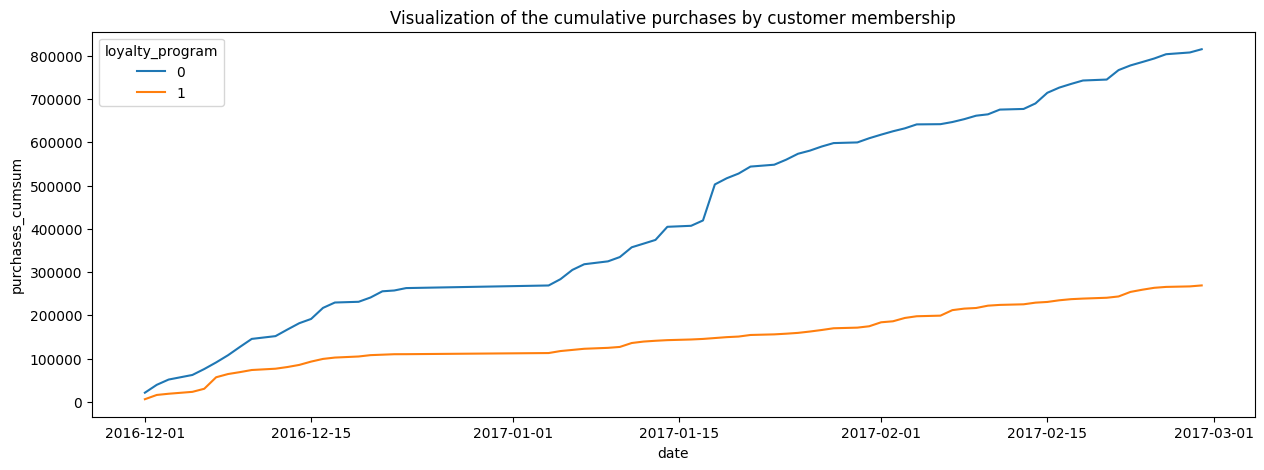

In [ ]:
# Figure out the cumulative purchases by loyalty_program using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_orders_cumulative, x='date', y='purchases_cumsum', hue='loyalty_program')
plt.title('Visualization of the cumulative purchases by customer membership');

**Findings:**

- At the beginning of Dec 2016, the position of non-loyalty members is slightly higher than loyalty members.
- In the mid of Jan 2017, the non-loyalty members took the lead and held on until the end of the data.

**Insight:**

- The non-loyalty members generates more purchases than the loyalty members.

**Assumption:**

- We assumed that the loyalty program has no effect on increasing customer's purchases.

### The cumulative average purchase frequency by customer membership

Figure out the cumulative average purchase frequency customer membership.

In [ ]:
# Calculate the cumulative average purchase frequency by customer membership

df_orders_cumulative['purchase_size_cum'] = \
                    (df_orders_cumulative['purchases_cumsum'] / df_orders_cumulative['purchase_id']).round()
df_orders_cumulative

,date,loyalty_program,total_purchases,purchase_id,customer_id,purchases_cumsum,purchase_id_cumsum,customer_id_cumsum,purchase_size_cum
0,2016-12-01,1,6044.0,49,36,6044.0,49,36,123.0
0,2016-12-01,0,21105.0,85,63,21105.0,85,63,248.0
1,2016-12-02,1,9847.0,66,36,15891.0,115,72,241.0
1,2016-12-02,0,18225.0,97,82,39330.0,182,145,405.0
2,2016-12-03,1,2816.0,25,20,18707.0,140,92,748.0
...,...,...,...,...,...,...,...,...,...
65,2017-02-25,1,2087.0,9,9,265684.0,1320,1154,29520.0
66,2017-02-27,0,4040.0,27,24,807628.0,3142,2447,29912.0
66,2017-02-27,1,1175.0,8,7,266859.0,1328,1161,33357.0
67,2017-02-28,1,2239.0,16,15,269098.0,1344,1176,16819.0


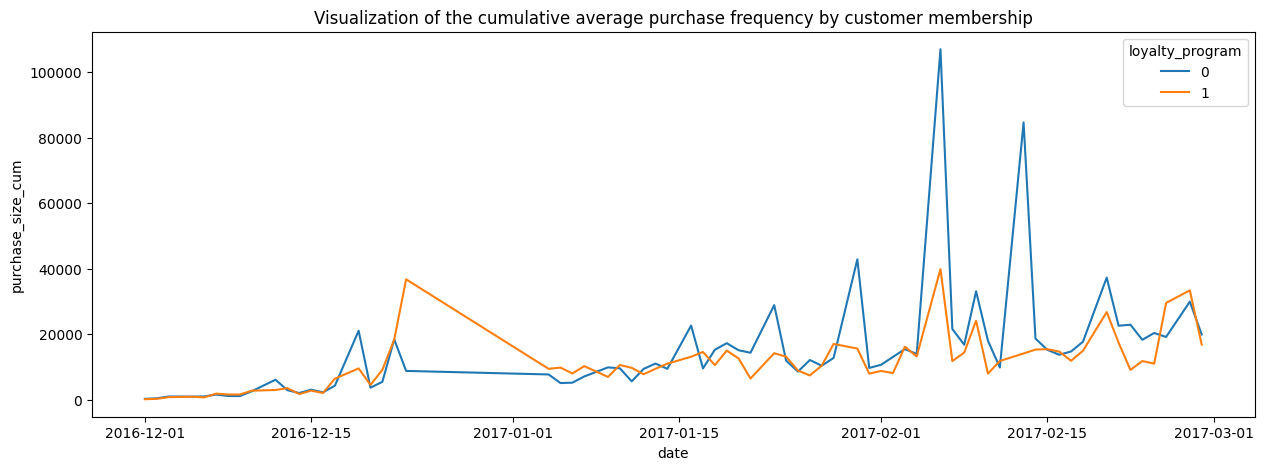

In [ ]:
# Figure out the cumulative average purchase frequency by loyalty_program using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_orders_cumulative, x='date', y='purchase_size_cum', hue='loyalty_program')
plt.title('Visualization of the cumulative average purchase frequency by customer membership');

**Findings:**

- At the beginning of Dec 2016, the loyalty members and non-loyalty members were in the same position.
- In the last of Dec 2016, the loyalty members took the lead for a while, however, in the mid of Jan 2017 the non-loyalty members took the lead and held on until the end of the data.

**Insight:**

- The non-loyalty members generates more purchases than the loyalty members.

**Assumption:**

- We assumed that the loyalty program has no effect on increasing customer's purchase frequency.

### The relative differences for the cumulative average purchase frequency of the loyalty members 

- Draw the relative differences for the cumulative average purchase frequency of the loyalty members as compared to the non-loyalty members.

In [ ]:
# Grouping data cumulative by each group and save it into new tables

df_cum_loyalty = df_orders_cumulative[df_orders_cumulative['loyalty_program'] == 1].reset_index(drop=True)
df_cum_non_loyalty = df_orders_cumulative[df_orders_cumulative['loyalty_program'] == 0].reset_index(drop=True)


In [ ]:
# Join table of df_cumulative_a and df_cumulative_b

df_merge_cum = df_cum_non_loyalty.merge(df_cum_loyalty,
                                     on='date',
                                     how='left',
                                     suffixes=['_N', '_L'])
df_merge_cum

,date,loyalty_program_N,total_purchases_N,purchase_id_N,customer_id_N,purchases_cumsum_N,purchase_id_cumsum_N,customer_id_cumsum_N,purchase_size_cum_N,loyalty_program_L,total_purchases_L,purchase_id_L,customer_id_L,purchases_cumsum_L,purchase_id_cumsum_L,customer_id_cumsum_L,purchase_size_cum_L
0,2016-12-01,0,21105.0,85,63,21105.0,85,63,248.0,1,6044.0,49,36,6044.0,49,36,123.0
1,2016-12-02,0,18225.0,97,82,39330.0,182,145,405.0,1,9847.0,66,36,15891.0,115,72,241.0
2,2016-12-03,0,12176.0,54,36,51506.0,236,181,954.0,1,2816.0,25,20,18707.0,140,92,748.0
3,2016-12-05,0,10619.0,68,51,62125.0,304,232,914.0,1,4379.0,26,25,23086.0,166,117,888.0
4,2016-12-06,0,13723.0,78,52,75848.0,382,284,972.0,1,7140.0,44,39,30226.0,210,156,687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2017-02-23,0,7887.0,43,35,785570.0,3034,2350,18269.0,1,5090.0,22,19,259199.0,1287,1124,11782.0
64,2017-02-24,0,8112.0,39,37,793682.0,3073,2387,20351.0,1,4398.0,24,21,263597.0,1311,1145,10983.0
65,2017-02-25,0,9906.0,42,36,803588.0,3115,2423,19133.0,1,2087.0,9,9,265684.0,1320,1154,29520.0
66,2017-02-27,0,4040.0,27,24,807628.0,3142,2447,29912.0,1,1175.0,8,7,266859.0,1328,1161,33357.0


In [ ]:
# Calculate the cumulative average purchase size of loyalty members divided by non-loyalty members 
# to get relative purchase size

df_merge_cum['relative_purchase_size'] = df_merge_cum['purchase_size_cum_L'] / df_merge_cum['purchase_size_cum_N'] - 1
df_merge_cum.head()

,date,loyalty_program_N,total_purchases_N,purchase_id_N,customer_id_N,purchases_cumsum_N,purchase_id_cumsum_N,customer_id_cumsum_N,purchase_size_cum_N,loyalty_program_L,total_purchases_L,purchase_id_L,customer_id_L,purchases_cumsum_L,purchase_id_cumsum_L,customer_id_cumsum_L,purchase_size_cum_L,relative_purchase_size
0,2016-12-01,0,21105.0,85,63,21105.0,85,63,248.0,1,6044.0,49,36,6044.0,49,36,123.0,-0.504032258064516
1,2016-12-02,0,18225.0,97,82,39330.0,182,145,405.0,1,9847.0,66,36,15891.0,115,72,241.0,-0.404938271604938
2,2016-12-03,0,12176.0,54,36,51506.0,236,181,954.0,1,2816.0,25,20,18707.0,140,92,748.0,-0.215932914046122
3,2016-12-05,0,10619.0,68,51,62125.0,304,232,914.0,1,4379.0,26,25,23086.0,166,117,888.0,-0.028446389496718
4,2016-12-06,0,13723.0,78,52,75848.0,382,284,972.0,1,7140.0,44,39,30226.0,210,156,687.0,-0.293209876543210


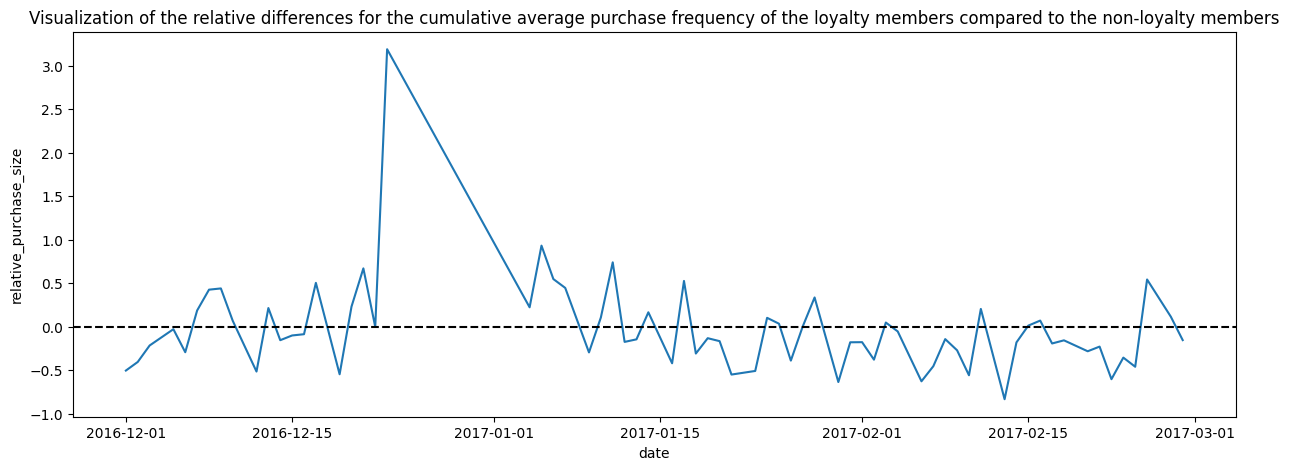

In [ ]:
# Visualization of the relative differences for the cumulative average purchase frequency of the loyalty members
# compared to the non-loyalty members using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_merge_cum, x='date', y='relative_purchase_size')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Visualization of the relative differences for the cumulative average purchase frequency of the loyalty members compared to the non-loyalty members');



**Findings:**

- Data shows that the average purchase size mostly by the non-loyalty members, which is many lines are below the dotted line.
- In the last of Dec 2016, the loyalty members took the lead for a while, however, in the mid og Jan 2017 the non-loyalty members took the lead and held on until the end of the data.

**Insight:**

- Mostly the average purchase size made by the loyalty members is higher than the non-loyalty members.

**Assumption:**

- We assumed that the loyalty program has no effect on increasing customer's purchase size.

### The relationship between purchase and customer membership
#### Find the total amount and the average of purchases of each user

In [ ]:
# Grouping by customer_id to get the total purchases and the average of purchases of each user ($)

pivot_purchases = df_retail.pivot_table(index='customer_id',values='total_purchases', aggfunc={'sum', 'mean'}
                                       ).reset_index() 

pivot_purchases = pivot_purchases.rename(columns={'mean': 'avg_total_purchases', 'sum': 'total_purchases'})
pivot_purchases['avg_total_purchases'] = pivot_purchases['avg_total_purchases'].round()
pivot_purchases['total_purchases'] = pivot_purchases['total_purchases'].round()
pivot_purchases

,customer_id,avg_total_purchases,total_purchases
0,0.0,5.0,82313.0
1,18025.0,38591.0,77183.0
2,18026.0,13.0,752.0
3,18027.0,32.0,738.0
4,18029.0,11.0,195.0
...,...,...,...
1745,23938.0,4.0,30.0
1746,23939.0,10.0,403.0
1747,23948.0,10.0,78.0
1748,23956.0,0.0,0.0


In [ ]:
# Split the column of customer_id and loyalty_program from the df_retail table

df_customer = df_retail[['customer_id', 'loyalty_program']]
df_customer = df_customer.loc[~(df_customer['customer_id'] == 'unspecified')]
df_customer = df_customer.drop_duplicates().reset_index(drop=True)
df_customer

,customer_id,loyalty_program
0,18427.0,0
1,22389.0,1
2,22182.0,1
3,23522.0,1
4,23151.0,1
...,...,...
1745,20255.0,0
1746,23792.0,1
1747,20156.0,0
1748,20358.0,0


In [ ]:
# Merge the table pivot_purchases with df_customer to get the loyalty_program column

pivot_purchases = pivot_purchases.merge(right=df_customer, on='customer_id', how='inner')
pivot_purchases

,customer_id,avg_total_purchases,total_purchases,loyalty_program
0,0.0,5.0,82313.0,0
1,18025.0,38591.0,77183.0,0
2,18026.0,13.0,752.0,0
3,18027.0,32.0,738.0,0
4,18029.0,11.0,195.0,0
...,...,...,...,...
1745,23938.0,4.0,30.0,1
1746,23939.0,10.0,403.0,1
1747,23948.0,10.0,78.0,1
1748,23956.0,0.0,0.0,1


In [ ]:
# Get the average purchase for loyalty membership customer

print('The total average purchase for loyalty membership customer is:'\
      , (pivot_purchases.loc[pivot_purchases['loyalty_program'] == 1]).mean()['total_purchases'])

The total average purchase for loyalty membership customer is: 458.4173764906303


In [ ]:
# Get the average purchase for non loyalty membership customer

print('The total average purchase for non loyalty membership customer is:'\
      , (pivot_purchases.loc[pivot_purchases['loyalty_program'] == 0]).mean()['total_purchases'])

The total average purchase for non loyalty membership customer is: 700.8856405846948


#### Correlation the relationship between purchase and customer membership

In [ ]:
# Delete the column of customer_id for calculate the correlation

corr_pivot_purchases = pivot_purchases[['avg_total_purchases', 'total_purchases', 'loyalty_program']]
corr_pivot_purchases

,avg_total_purchases,total_purchases,loyalty_program
0,5.0,82313.0,0
1,38591.0,77183.0,0
2,13.0,752.0,0
3,32.0,738.0,0
4,11.0,195.0,0
...,...,...,...
1745,4.0,30.0,1
1746,10.0,403.0,1
1747,10.0,78.0,1
1748,0.0,0.0,1


In [ ]:
# Correlation churn with features

corr_pivot_purchases.corr()['loyalty_program']

avg_total_purchases   -0.017602110294115
total_purchases       -0.035446191919362
loyalty_program        1.000000000000000
Name: loyalty_program, dtype: float64

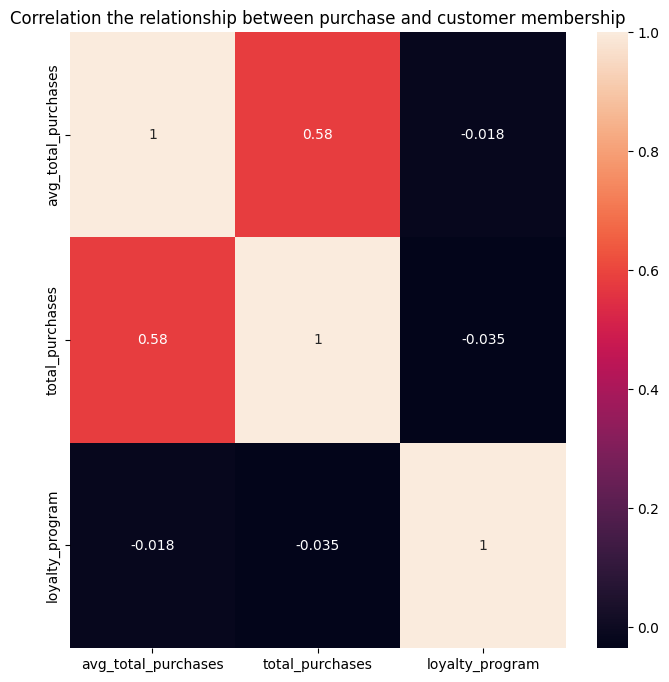

In [ ]:
# Correlation matrix

plt.figure(figsize=(8,8))
sns.heatmap(corr_pivot_purchases.corr(), annot=True)
plt.title('Correlation the relationship between purchase and customer membership')
plt.show()

**Findings:**

- The average total purchases of loyalty membership customer is less than the non loyalty membership customer (USD 458 
vs. USD 700)
- From the correlation matrix, it shows that the relationship purchase; `avg_total_purchases` and `total_purchases` have a negative relationship with customer membership.

**Insights:**
- We can say that by pay $20 per month to become loyalty program's members is not make the customer increase their purchase. 

#### Make a scatter chart for the number of purchase price per user

In [ ]:
# Look back to the pivot_purchases table

scatter_price = df_retail.reset_index()
scatter_price

,index,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,price_per_one,total_purchases
0,0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,0.42,4.6
1,1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,1.65,0.0
2,2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,0.72,5.0
3,3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,2.55,0.0
4,4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
84113,84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13,1.25,1.2
84114,84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05,5.95,0.0
84115,84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09,6.95,7.0
84116,84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10,0.42,4.6


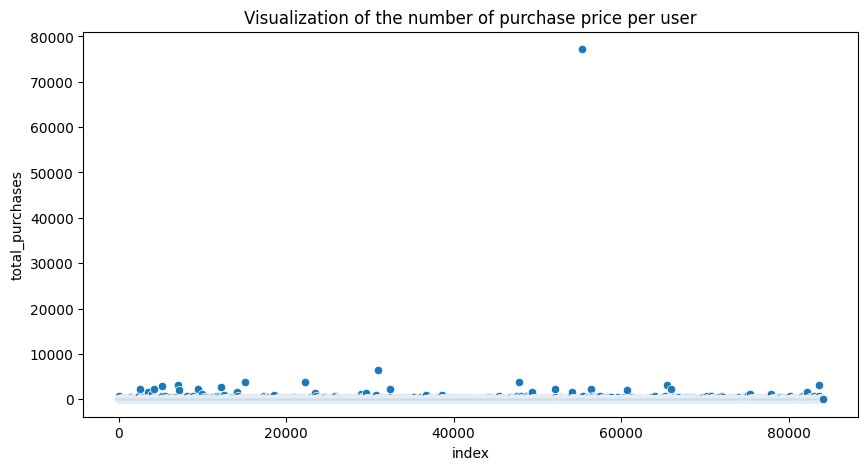

In [ ]:
# Visualization of the number of purchase frequency per user using scatter plot

plt.figure(figsize=(10,5))
sns.scatterplot(data=scatter_price, x='index', y='total_purchases')
plt.title('Visualization of the number of purchase price per user');

In [ ]:
# See the distribution of total_purchases

scatter_price['total_purchases'].describe()

count    84118.000000000000000
mean        12.889476687510399
std        272.296762937698304
min          0.000000000000000
25%          0.000000000000000
50%          3.800000000000000
75%         11.199999999999999
max      77182.600000000005821
Name: total_purchases, dtype: float64

**Findings:**

- The average purchase price per customer is $12.

- While outliers orders is around > $11.

**Insights:**

- Majority customers only made purchase with price is $12.

- The number of customers purchase more than $12 is probably very small.

**Assumptions:**

- Majority customers only made purchase with price is $12.
- We need to calculate the percentile for the price of purchases per user to check an anomaly.

#### Calculate the 95th and 99th percentile for the number of purchase price per user

- Determine the point when a data point turns into an anomaly.

In [ ]:
# Calculate the 95th and 99th percentile for the number of purchases per user

np.percentile(scatter_price['total_purchases'], [95, 99])

array([ 39.615, 143.028])

**Findings:**

- 95% of users made purchase price of $39.615 and below.

- 99% of users made purchase price of $143.028 and below.

**Insights:**

- The number of users who made purchases over the price of $39.615 did not exceed 5%.

- Those who made purchases over $143.028 only amounted to 1%.

**Assumptions:**

- We can assume that customers who order more than $39.615 are either outliers or anomalies.

### The relationship between purchase frequency and customer membership
#### Find how many times each user do purchases

In [ ]:
# Look at the df_retail table

df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,price_per_one,total_purchases
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,0.42,4.6
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,1.65,0.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,0.72,5.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,2.55,0.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13,1.25,1.2
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05,5.95,0.0
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09,6.95,7.0
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10,0.42,4.6


In [ ]:
# Grouping by customer_id to get how many times each user do purchases

pivot_frequency = df_retail.pivot_table(index='customer_id', values='purchase_id', aggfunc='nunique').reset_index() 
pivot_frequency = pivot_frequency.rename(columns={'purchase_id': 'frequency_purchases'})
pivot_frequency

,customer_id,frequency_purchases
0,0.0,381
1,18025.0,2
2,18026.0,2
3,18027.0,2
4,18029.0,1
...,...,...
1745,23938.0,1
1746,23939.0,3
1747,23948.0,2
1748,23956.0,1


In [ ]:
# Merge the table pivot_frequency with df_customer to get the loyalty_program column
# Delete the first row because customer id is 0 and become an outlier

pivot_frequency = pivot_frequency.merge(right=df_customer, on='customer_id', how='inner')
pivot_frequency

,customer_id,frequency_purchases,loyalty_program
0,0.0,381,0
1,18025.0,2,0
2,18026.0,2,0
3,18027.0,2,0
4,18029.0,1,0
...,...,...,...
1745,23938.0,1,1
1746,23939.0,3,1
1747,23948.0,2,1
1748,23956.0,1,1


In [ ]:
# Get the average purchase for loyalty membership customer

print('The total average purchase frequency for loyalty membership customer is:'\
      , (pivot_frequency.loc[pivot_frequency['loyalty_program'] == 1]).mean()['frequency_purchases'])

The total average purchase frequency for loyalty membership customer is: 2.2896081771720613


In [ ]:
# Get the average purchase for non loyalty membership customer

print('The total average purchase for non loyalty membership customer is:'\
      , (pivot_frequency.loc[pivot_frequency['loyalty_program'] == 0]).mean()['frequency_purchases'])

The total average purchase for non loyalty membership customer is: 2.7368873602751504


#### Correlation the relationship between purchase and customer membership

In [ ]:
# Delete the column of customer_id for calculate the correlation
# Delete the 

corr_pivot_freq = pivot_frequency[['frequency_purchases', 'loyalty_program']]
corr_pivot_freq

,frequency_purchases,loyalty_program
0,381,0
1,2,0
2,2,0
3,2,0
4,1,0
...,...,...
1745,1,1
1746,3,1
1747,2,1
1748,1,1


In [ ]:
# Correlation churn with features

corr_pivot_freq.corr()['loyalty_program']

frequency_purchases   -0.022171071142481
loyalty_program        1.000000000000000
Name: loyalty_program, dtype: float64

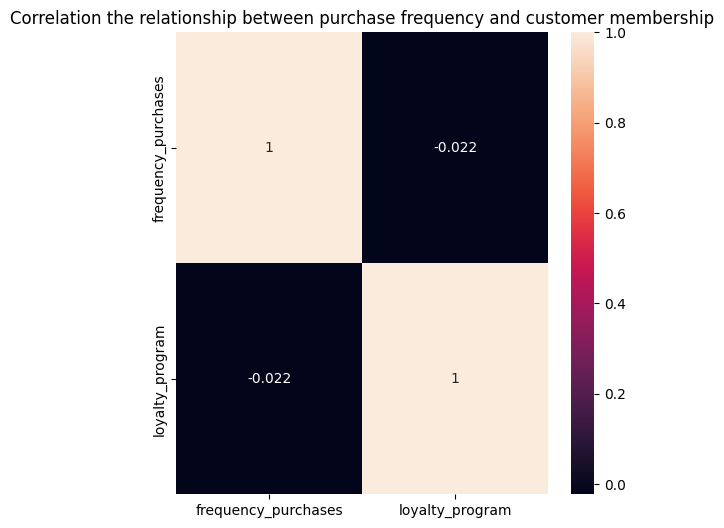

In [ ]:
# Correlation matrix

plt.figure(figsize=(6,6))
sns.heatmap(corr_pivot_freq.corr(), annot=True)
plt.title('Correlation the relationship between purchase frequency and customer membership')
plt.show()

**Findings:**

- The average total purchases of loyalty membership customer is less than the non loyalty membership customer (2.28 vs. 2.73).
- From the correlation matrix, it shows that the relationship purchase frequency have a negative relationship with customer membership.


**Insights:**
- We can say that by pay $20 per month to become loyalty program's members is not make the customer increase their purchase frequency. 

#### Make a scatter chart for the number of  purchase frequency per user

In [ ]:
# Look back to the pivot_frequency table

pivot_frequency = pivot_frequency.reset_index()
pivot_frequency

,index,customer_id,frequency_purchases,loyalty_program
0,0,0.0,381,0
1,1,18025.0,2,0
2,2,18026.0,2,0
3,3,18027.0,2,0
4,4,18029.0,1,0
...,...,...,...,...
1745,1745,23938.0,1,1
1746,1746,23939.0,3,1
1747,1747,23948.0,2,1
1748,1748,23956.0,1,1


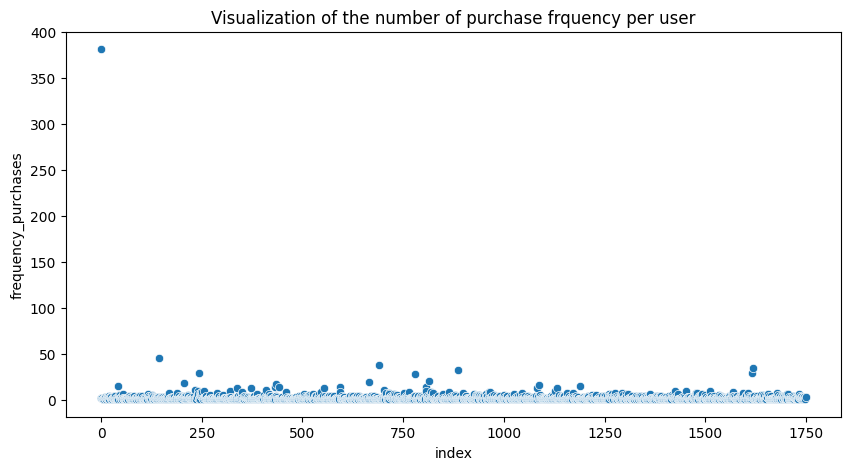

In [ ]:
# Visualization of the number of purchase frequency per user using scatter plot

plt.figure(figsize=(10,5))
sns.scatterplot(data=pivot_frequency, x='index', y='frequency_purchases')
plt.title('Visualization of the number of purchase frquency per user');

In [ ]:
# See the distribution of frequency_purchases

pivot_frequency['frequency_purchases'].describe()

count    1750.000000000000000
mean        2.586857142857143
std         9.527676206810424
min         1.000000000000000
25%         1.000000000000000
50%         1.000000000000000
75%         3.000000000000000
max       381.000000000000000
Name: frequency_purchases, dtype: float64

**Findings:**

- The average purchase frequency is 2 times.
- While outliers orders is between 20 to 381 times.

**Insights:**

- Majority customers only made order 2 times.
- The number of users placing more than 2 orders is very small.

**Assumptions:**

- Majority customers only made order 2 times.
- We need to calculate the percentile for the number of purchases per user to check an anomaly.

#### Calculate the 95th and 99th percentile for the number of purchases per user

- Determine the point when a data point turns into an anomaly.

In [ ]:
# Calculate the 95th and 99th percentile for the number of purchases per user

np.percentile(pivot_frequency['frequency_purchases'], [95, 99])

array([ 7., 14.])

**Findings:**

- 95% of users made 7 purchases and below.
- 99% of users made 14 purchases and below.

**Insights:**

- The number of customers who made purchases for more than 7 orders did not exceed 5%.
- Those who made orders for more than 14 purchases only amounted to 1%.

**Assumptions:**

- We can assume that customers who order more than 7 orders are either outliers or anomalies.

### Cohort Analysis

- Analyzed changes in average purchase size ($) for each cohort for loyalty program members/non-members.

In [ ]:
# Look back at the df_retail table

df_retail

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,date,price_per_one,total_purchases
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3,2016-12-10,0.42,4.6
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2,2016-12-14,1.65,0.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3,2016-12-14,0.72,5.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28,2017-02-09,2.55,0.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28,2017-02-13,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
84113,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0,2016-12-13,1.25,1.2
84114,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24,2017-01-05,5.95,0.0
84115,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16,2016-12-09,6.95,7.0
84116,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29,2016-12-10,0.42,4.6


In [ ]:
# Get the first day of purchase of each customers

first_purchase = df_retail.groupby('customer_id').agg({'date': 'min'}).reset_index()
first_purchase.columns = ['customer_id','first_purch_date']
first_purchase

,customer_id,first_purch_date
0,0.0,2016-12-01
1,18025.0,2017-01-18
2,18026.0,2016-12-07
3,18027.0,2016-12-16
4,18029.0,2017-02-02
...,...,...
1745,23938.0,2016-12-08
1746,23939.0,2016-12-16
1747,23948.0,2016-12-08
1748,23956.0,2017-01-25


In [ ]:
# Gets the first purchase_date per year and per month

first_purchase['first_purch_year'] = first_purchase['first_purch_date'].astype('datetime64[Y]')
first_purchase['first_purch_month'] = first_purchase['first_purch_date'].astype('datetime64[M]')

In [ ]:
# Join table df_retail & first_purchase based on the customer_id column

viz = pd.merge(df_retail, first_purchase, on ='customer_id')
viz.drop(['product_id', 'quantity', 'date', 'shop_id', 'price_per_one'], axis=1, inplace=True)
viz

,purchase_id,purchase_date,customer_id,loyalty_program,total_purchases,first_purch_date,first_purch_year,first_purch_month
0,538280,2016-12-10 12:50:00,18427.0,0,4.600000000000000,2016-12-01,2016-01-01,2016-12-01
1,537142,2016-12-05 12:57:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01
2,537354,2016-12-06 12:23:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01
3,537225,2016-12-05 16:41:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01
4,537871,2016-12-08 17:20:00,18427.0,0,6.400000000000000,2016-12-01,2016-01-01,2016-12-01
...,...,...,...,...,...,...,...,...
84113,536834,2016-12-02 17:51:00,20255.0,0,13.800000000000001,2016-12-02,2016-01-01,2016-12-01
84114,537360,2016-12-06 12:31:00,23792.0,1,75.299999999999997,2016-12-06,2016-01-01,2016-12-01
84115,544079,2017-02-15 15:44:00,20156.0,0,163.400000000000006,2017-02-15,2017-01-01,2017-02-01
84116,C536853,2016-12-03 10:07:00,20358.0,0,0.000000000000000,2016-12-03,2016-01-01,2016-12-01


In [ ]:
# Calculates the distance based on months from the first purchase date to the next purchase for each customer

viz['age_days'] = (viz['purchase_date'] - viz['first_purch_date']).dt.days
viz['age_months'] = round(viz['age_days'] / 30,0).astype('int')

viz

,purchase_id,purchase_date,customer_id,loyalty_program,total_purchases,first_purch_date,first_purch_year,first_purch_month,age_days,age_months
0,538280,2016-12-10 12:50:00,18427.0,0,4.600000000000000,2016-12-01,2016-01-01,2016-12-01,9,0
1,537142,2016-12-05 12:57:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,4,0
2,537354,2016-12-06 12:23:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,5,0
3,537225,2016-12-05 16:41:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,4,0
4,537871,2016-12-08 17:20:00,18427.0,0,6.400000000000000,2016-12-01,2016-01-01,2016-12-01,7,0
...,...,...,...,...,...,...,...,...,...,...
84113,536834,2016-12-02 17:51:00,20255.0,0,13.800000000000001,2016-12-02,2016-01-01,2016-12-01,0,0
84114,537360,2016-12-06 12:31:00,23792.0,1,75.299999999999997,2016-12-06,2016-01-01,2016-12-01,0,0
84115,544079,2017-02-15 15:44:00,20156.0,0,163.400000000000006,2017-02-15,2017-01-01,2017-02-01,0,0
84116,C536853,2016-12-03 10:07:00,20358.0,0,0.000000000000000,2016-12-03,2016-01-01,2016-12-01,0,0


In [ ]:
# Slice the table into each customer membership

viz_loyalty = viz.loc[viz['loyalty_program'] == 1].reset_index(drop=True)
viz_non_loyalty = viz.loc[viz['loyalty_program'] == 0].reset_index(drop=True)

In [ ]:
# Look at the viz_loyalty table

viz_loyalty

,purchase_id,purchase_date,customer_id,loyalty_program,total_purchases,first_purch_date,first_purch_year,first_purch_month,age_days,age_months
0,538862,2016-12-14 14:11:00,22389.0,1,0.000000000000000,2016-12-06,2016-01-01,2016-12-01,8,0
1,537382,2016-12-06 13:13:00,22389.0,1,0.000000000000000,2016-12-06,2016-01-01,2016-12-01,0,0
2,537382,2016-12-06 13:13:00,22389.0,1,0.800000000000000,2016-12-06,2016-01-01,2016-12-01,0,0
3,538862,2016-12-14 14:11:00,22389.0,1,4.200000000000000,2016-12-06,2016-01-01,2016-12-01,8,0
4,537382,2016-12-06 13:13:00,22389.0,1,0.000000000000000,2016-12-06,2016-01-01,2016-12-01,0,0
...,...,...,...,...,...,...,...,...,...,...
23403,540175,2017-01-05 12:37:00,22211.0,1,0.000000000000000,2017-01-05,2017-01-01,2017-01-01,0,0
23404,C538734,2016-12-14 11:24:00,22489.0,1,0.000000000000000,2016-12-14,2016-01-01,2016-12-01,0,0
23405,544805,2017-02-23 14:50:00,23747.0,1,83.099999999999994,2017-02-23,2017-01-01,2017-02-01,0,0
23406,537360,2016-12-06 12:31:00,23792.0,1,75.299999999999997,2016-12-06,2016-01-01,2016-12-01,0,0


In [ ]:
# Look at the viz_non_loyalty table

viz_non_loyalty

,purchase_id,purchase_date,customer_id,loyalty_program,total_purchases,first_purch_date,first_purch_year,first_purch_month,age_days,age_months
0,538280,2016-12-10 12:50:00,18427.0,0,4.600000000000000,2016-12-01,2016-01-01,2016-12-01,9,0
1,537142,2016-12-05 12:57:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,4,0
2,537354,2016-12-06 12:23:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,5,0
3,537225,2016-12-05 16:41:00,18427.0,0,0.000000000000000,2016-12-01,2016-01-01,2016-12-01,4,0
4,537871,2016-12-08 17:20:00,18427.0,0,6.400000000000000,2016-12-01,2016-01-01,2016-12-01,7,0
...,...,...,...,...,...,...,...,...,...,...
60705,C542916,2017-02-01 16:21:00,21619.0,0,0.000000000000000,2017-02-01,2017-01-01,2017-02-01,0,0
60706,536835,2016-12-02 18:06:00,18824.0,0,0.000000000000000,2016-12-02,2016-01-01,2016-12-01,0,0
60707,536834,2016-12-02 17:51:00,20255.0,0,13.800000000000001,2016-12-02,2016-01-01,2016-12-01,0,0
60708,544079,2017-02-15 15:44:00,20156.0,0,163.400000000000006,2017-02-15,2017-01-01,2017-02-01,0,0


#### The average purchase cohort for loyalty members

In [ ]:
# Create a pivot table for the average purchase cohort for loyalty members

cohorts_loyalty = viz_loyalty.pivot_table(
    index='first_purch_month', columns='age_months', values='total_purchases', aggfunc='mean')

In [ ]:
# Showing the average purchase cohort for loyalty members

cohorts_loyalty.fillna('')

age_months,0,1,2,3
first_purch_month,,,,
2016-12-01,11.396165038453544,13.289626373626374,16.245013317549571,12.327837514934288
2017-01-01,7.246484848484849,7.846711409395973,9.453333333333333,
2017-02-01,10.473408360128618,13.082105263157894,,


In [ ]:
# Create a function to get changes in average purchase size cohort for loyalty members

cohorts_loyalty_percentage = pd.DataFrame()
for col in cohorts_loyalty.columns:
    cohorts_loyalty_percentage = pd.concat([cohorts_loyalty_percentage, cohorts_loyalty[col]/cohorts_loyalty[0]*100], 
                                           axis=1)
cohorts_loyalty_percentage.columns = cohorts_loyalty.columns

In [ ]:
# Showing the average purchases for loyalty members

cohorts_loyalty_percentage.fillna('')

age_months,0,1,2,3
2016-12-01 00:00:00,100.0,116.614899212005213,142.548070010699092,108.175315760495266
2017-01-01 00:00:00,100.0,108.283003048528045,130.454055048633819,
2017-02-01 00:00:00,100.0,124.907812369470534,,


In [ ]:
# Get the average changes in the following month after customer's first purchase for loyalty members

print('On average, {0:.0%} of the average changes in the following month after customer first purchase for loyalty members.'.format(
    cohorts_loyalty_percentage[1].mean()))


On average, 117% of the average changes in the following month after customer first purchase for loyalty members.


In [ ]:
# Look at the average customer's purchase after one month for loyalty members

cohorts_loyalty_percentage[1].mean()

116.60190487666794

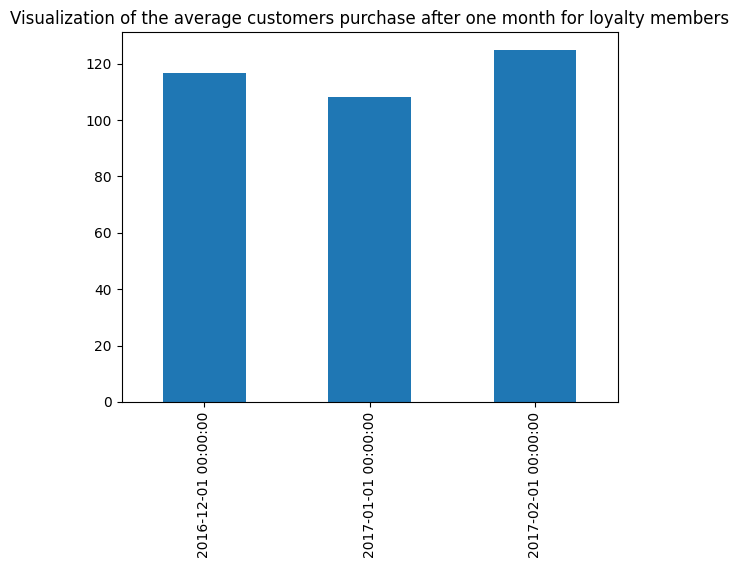

In [ ]:
# Visualization

cohorts_loyalty_percentage[1].plot(kind='bar')
plt.title('Visualization of the average customers purchase after one month for loyalty members');

**Findings:**

- The average customers purchase ($) after one month for loyalty members is around 117%, where the Feb 2017 cohort was the highest at around 124%.

- From Dec 2016 cohort, in the third month after the first month, the average customers purchase ($) decrease vs. the second month (108% vs. 142%).

**Insights:**

- The average customer purchase size ($) can increase only two months after their first purchase month for loyalty members. 

**Assumptions:**

- It is a short period for loyalty members can be loyal customers. We can say this loyalty program is not really driving the average customer's purchase ($) increase.

#### The average purchase cohort for non-loyalty members

In [ ]:
# Create a pivot table for the average purchase cohort for non-loyalty members

cohorts_non_loyalty = viz_non_loyalty.pivot_table(
    index='first_purch_month', columns='age_months', values='total_purchases', aggfunc='mean')

In [ ]:
# Showing the average purchase cohort for non-loyalty members

cohorts_non_loyalty.fillna('')

age_months,0,1,2,3
first_purch_month,,,,
2016-12-01,11.860994427775395,12.224402606806663,12.698773455377575,9.196761782622636
2017-01-01,23.852209869848156,17.381914268937170,17.264062500000001,
2017-02-01,10.374148039574935,17.880000000000003,,


In [ ]:
# Create a function to get changes in average purchase frequency cohort for non-loyalty members

cohorts_non_loyalty_percentage = pd.DataFrame()
for col in cohorts_non_loyalty.columns:
    cohorts_non_loyalty_percentage = pd.concat([cohorts_non_loyalty_percentage, 
                                                cohorts_non_loyalty[col]/cohorts_non_loyalty[0]*100], axis=1)
cohorts_non_loyalty_percentage.columns = cohorts_non_loyalty.columns

In [ ]:
# Showing the retention cohort for non-loyalty members

cohorts_non_loyalty_percentage.fillna('')

age_months,0,1,2,3
2016-12-01 00:00:00,100.0,103.063893008669311,107.063311872403517,77.537864456678165
2017-01-01 00:00:00,100.0,72.873391454222613,72.379299839314655,
2017-02-01 00:00:00,100.0,172.351502328596098,,


In [ ]:
# Get the average changes in the following month after customer's first purchase for non-loyalty members

print('On average, {0:.0%} of the average changes in the following month after customer first purchase for non-loyalty members.'.format(
    cohorts_non_loyalty_percentage[1].mean()))


On average, 116% of the average changes in the following month after customer first purchase for non-loyalty members.


In [ ]:
# Look at the average customer's purchase after one month for non-loyalty members

cohorts_non_loyalty_percentage[1].mean()

116.09626226382933

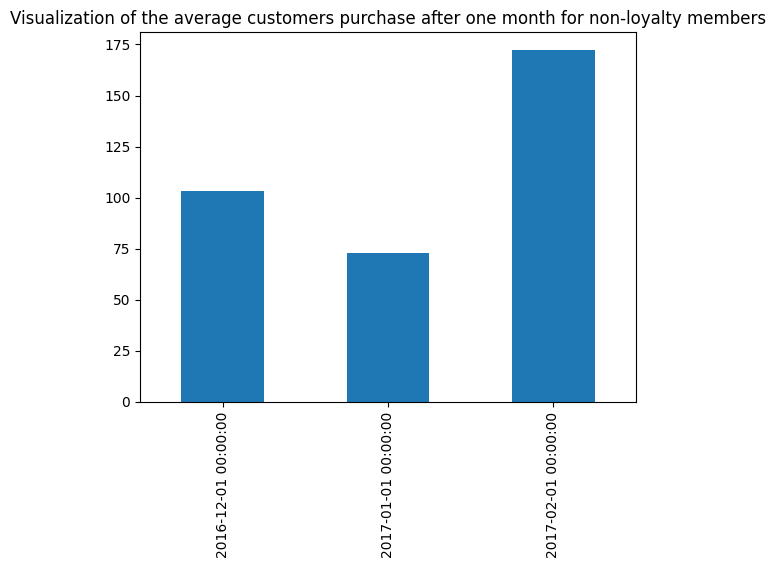

In [ ]:
# Visualization

cohorts_non_loyalty_percentage[1].plot(kind='bar')
plt.title('Visualization of the average customers purchase after one month for non-loyalty members');

**Findings:**

- The average customers purchase ($) after one month for non-loyalty members is around 116%, where the Feb 2017 cohort was the highest at around 172%.

- From Dec 2016 cohort, in the third month after the first month, the average customers purchase ($) decrease vs. the second month (77% vs. 107%).

**Insights:**

- The average customer purchase size ($) can increase only two months after their first purchase month for loyalty members. 

**Assumptions:**

- It is a short period for each cohort for loyalty program members/non-members.
- There are no differences of changes in average purchase size for each cohort for loyalty program members and non-members (117% vs. 116%).

## Hypothesis Testing 

- The hypothesis is about the average purchase size is higher for loyalty program members than non-members. 
    - The significance level / "alpha" value to be used = 0.05. 
        - If p_value < alpha, we reject the null hypothesis, means there is a significant difference between the average purchase size for loyalty program members and non-members.
        - If p_value > alpha, we failed to reject the null hypothesis, means there is no reason to consider the average purchase size for loyalty program members and non-members for different.

- Use the Independent T-Test approach
    - Ho = The average purchase size ($) for loyalty program members and non-members was statistically the same (=)
    
    - H1 = The average purchase size ($) for loyalty program members and non-members was statistically significant not the same (/=)
         

In [ ]:
# Look back the pivot_purchases table

pivot_purchases

,customer_id,avg_total_purchases,total_purchases,loyalty_program
0,0.0,5.0,82313.0,0
1,18025.0,38591.0,77183.0,0
2,18026.0,13.0,752.0,0
3,18027.0,32.0,738.0,0
4,18029.0,11.0,195.0,0
...,...,...,...,...
1745,23938.0,4.0,30.0,1
1746,23939.0,10.0,403.0,1
1747,23948.0,10.0,78.0,1
1748,23956.0,0.0,0.0,1


In [ ]:
# Create a new table to filter the columns we need

pivot_purchases_hypothesis = pivot_purchases[['customer_id', 'avg_total_purchases', 'loyalty_program']]
pivot_purchases_hypothesis

,customer_id,avg_total_purchases,loyalty_program
0,0.0,5.0,0
1,18025.0,38591.0,0
2,18026.0,13.0,0
3,18027.0,32.0,0
4,18029.0,11.0,0
...,...,...,...
1745,23938.0,4.0,1
1746,23939.0,10.0,1
1747,23948.0,10.0,1
1748,23956.0,0.0,1


In [ ]:
# Slicing the average purchase size data for each customer members

loyalty_members = pivot_purchases_hypothesis[pivot_purchases_hypothesis['loyalty_program'] == 1
                                            ].reset_index(drop=True)
non_loyalty_members = pivot_purchases_hypothesis[pivot_purchases_hypothesis['loyalty_program'] == 0
                                                ].reset_index(drop=True)

In [ ]:
# See to the each customer members table

loyalty_members

,customer_id,avg_total_purchases,loyalty_program
0,22005.0,4.0,1
1,22006.0,7.0,1
2,22011.0,6.0,1
3,22012.0,575.0,1
4,22018.0,0.0,1
...,...,...,...
582,23938.0,4.0,1
583,23939.0,10.0,1
584,23948.0,10.0,1
585,23956.0,0.0,1


In [ ]:
# See to the each customer members table

non_loyalty_members

,customer_id,avg_total_purchases,loyalty_program
0,0.0,5.0,0
1,18025.0,38591.0,0
2,18026.0,13.0,0
3,18027.0,32.0,0
4,18029.0,11.0,0
...,...,...,...
1158,21985.0,10.0,0
1159,21994.0,10.0,0
1160,21995.0,7.0,0
1161,21996.0,12.0,0


In [ ]:
# Calculate the varians from each members table

np.var(loyalty_members['avg_total_purchases']), np.var(non_loyalty_members['avg_total_purchases'])

(8864.444445089373, 1295553.995537381)

The `avg_total_purchases` variance is different between loyalty_members and non_loyalty_members. Then, for the calculation of the hypothesis test, equal_var is filled with **=False**.

In [ ]:
# The hypotesis testing that the average purchase size is higher for loyalty program members than non-members. 


alpha = 0.05  # critical statistical significance

results = st.ttest_ind(loyalty_members['avg_total_purchases'], non_loyalty_members['avg_total_purchases'],
                       equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("The null hypothesis is rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")

p-value: 0.30275123673680493
Failed to reject the null hypothesis: we cannot conclude the difference


**Findings:**

The results of hypothesis testing is failed to reject the null hypothesis, which means there is no reason to consider the average purchase size for loyalty program members are higher than non-members (they have similarities).

## Overall Conclusion

* **In the data pre-processing section:**
    1. Our datasets amounted **105335** rows and **7** columns for the df_retail and **3159** rows and **2** columns for the df_product.
    2. The range of data is between 1 Dec 2016 through 28 Feb 2017.
    3. We change all column names to lower casea dn snake_case to make analysis easier.
    4. There is missing values in the table of `df_retail` which is in the `customer_id` column of 36210 rows = 34.37% of the whole data:
        - There are 20216 rows (19.19% vs. the whole data) which contains missing values in the customer_id column and the zero values in the quantity column. It might be because of an error in the system when retrieving the data.
        - We remove them in the following step, since they will not impact the analysis.
        - While for the rest missing values in the customer_id column = 15994 rows, we've change the value with 0.
    5. There are 1001 rows that duplicated in the df_retail table and we've remove them.


* **In the Exploratory Data Analysis (EDA) section:**
    
    1. Cumulative purchase in USD and frequency:
        - At the beginning of Dec 2016, the position of the cumulative purchase ($) of non-loyalty members is slightly higher than loyalty members. Similar things happen to the cumulative purchase frequency.
        
        - In the mid of Jan 2017, the non-loyalty members took the lead and held on until the end of the data.
        - The average purchase frequency is mostly by the non-loyalty members, which is many lines below the dotted line. 
    2.  The relationship between purchase and customer membership:
        - The average total purchases of loyalty membership customers are less than the non-loyalty membership customer (USD 458 vs. USD 700).
        - The correlation matrix shows that the relationship purchase has a negative relationship with customer membership.
        - The average purchase price per customer is USD 12. While outliers orders are around > USD 11.
        - Of 95% of users made a purchase price of USD 39.615 and below, while 99% of users made a purchase price of USD 143.028 and below.
    3. The relationship between purchase frequency and customer membership:
        - The average total purchases of loyalty membership customers are less than that of non-loyalty membership customers (2.28 vs. 2.73). The correlation matrix shows that the relationship purchase frequency has a negative relationship with customer membership.
        - The average purchase frequency is 2 times. While outliers orders are between 20 to 381 times.
        - Of 95% of users made seven purchases and below. Of 99% of users made fourteen purchases and below. The number of users who made purchases for more than seven orders did not exceed 5%. Those who made orders for more than fourteen purchases only amounted to 1%.
    4. Cohort Analysis:
        - The average customers purchase ($) after one month for loyalty members is around 117%, where the Feb 2017 cohort was the highest at around 124%.
        
        - From Dec 2016 cohort, in the third month after the first month, the average customers purchase ($) decrease vs. the second month (108% vs. 142%). It's a short period for loyalty members can be loyal customers. We can say this loyalty program is not really driving the average customer's purchase increase.
        - The average customers purchase (USD) after one month for non-loyalty members is around 116%, where the Feb 2017 cohort was the highest at around 172%.
        
        - From Dec 2016 cohort, in the third month after the first month, the average customers purchase ($) decrease vs. the second month (77% vs. 107%).
        - There are no differences of changes in average purchase frequency for each cohort for loyalty program members and non-members (117% vs. 116%).


* **In the Hypothesis Testing section:**
    1. The hypothesis is about the average purchase size is higher for loyalty program members than non-members. 
        - The significance level / "alpha" value to be used = 0.05. 
        - Use the Independent T-Test approach
        - Ho = The average purchase size ($) for loyalty program members and non-members was statistically the same (=)

        - H1 = The average purchase size ($) for loyalty program members and non-members was statistically significant not the same (/=)
    2. The result of hypothesis testing is failed to reject the null hypothesis, which means there is no reason to consider the average purchase size for loyalty program members are higher than non-members (they have similarities).


* **Insights:**
     1. The loyalty program has no effect on increasing customer purchases ($) and customer purchase frequency.
     2. Paying USD20 per month to become loyalty program's members is not make the customer increase their purchase.
     3. Most of the customers only made purchase with price is USD12. However, we assumed customers who order more than USD39.615 are either outliers or anomalies.
     4. Most of the customers only made orders 2 times. While we also assumed customers who order more than 7 orders are either outliers or anomalies.


* **Recommendations:**
   1. Since the loyalty program has no effect on increasing customer purchases ($) and customer purchase frequency, we recommend stopping this loyalty program. It might be because they have to pay USD20 per month to become a loyalty member.
   2. We know that the average purchase decreased in the third month after their first purchase month for both cohort loyalty program members/non-members. To solve that, send them a reminder email, such as a voucher/discount/promo buy 2 get 1 free. The promotion can be followed with some Terms & Conditions applied, e.g. setting the minimum purchase.

Link presentation:

https://drive.google.com/file/d/1E7_MB7hDxj6WfC2Lu9MJgeJPycnDe7ii/view?usp=sharing

Link dashboard:

https://public.tableau.com/views/LoyaltyProgramAnalysis/LoyaltyProgramAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link